<a href="https://colab.research.google.com/github/seopp/Tobigs19/blob/main/Week7/Tobigs19_Dimensonality_Reduction_Week7_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

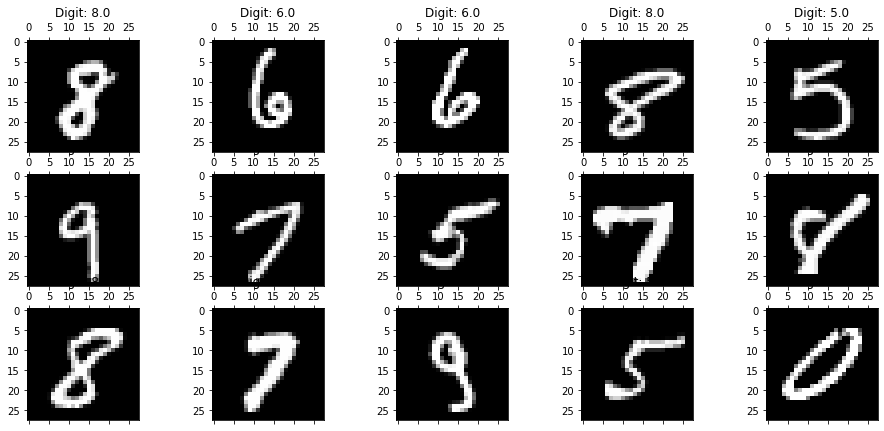

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)     

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [9]:
from sklearn.decomposition import PCA
pca = PCA()    
X_pca = pca.fit_transform(X_train)

In [10]:
exp_var_ratio = pca.explained_variance_ratio_
print(exp_var_ratio)     # 각 성분별 설명 비중 확인
print()
print(len(exp_var_ratio))

[9.75678051e-02 7.16149937e-02 6.14251519e-02 5.41491445e-02
 4.88996216e-02 4.29892660e-02 3.28487842e-02 2.88276637e-02
 2.75706270e-02 2.35063808e-02 2.10358800e-02 2.02766850e-02
 1.70567455e-02 1.70089317e-02 1.57933278e-02 1.48659731e-02
 1.32314377e-02 1.27952414e-02 1.18784344e-02 1.14535370e-02
 1.06816636e-02 1.00802076e-02 9.57775689e-03 9.08614949e-03
 8.82174510e-03 8.39075715e-03 8.11882474e-03 7.88316717e-03
 7.37981085e-03 6.91600774e-03 6.56548360e-03 6.45167231e-03
 6.02847708e-03 5.84097304e-03 5.67499023e-03 5.42222909e-03
 5.04994295e-03 4.85442515e-03 4.78547751e-03 4.67648913e-03
 4.55550281e-03 4.44538447e-03 4.18472050e-03 3.96098866e-03
 3.84098589e-03 3.74596455e-03 3.62351008e-03 3.49118847e-03
 3.37807813e-03 3.20960848e-03 3.17721504e-03 3.10198198e-03
 2.95852983e-03 2.88120695e-03 2.81518187e-03 2.69705696e-03
 2.67747560e-03 2.56946661e-03 2.52919826e-03 2.44633609e-03
 2.41706435e-03 2.38388808e-03 2.28009716e-03 2.20364543e-03
 2.13483054e-03 2.065413

In [11]:
# !pip install kneed

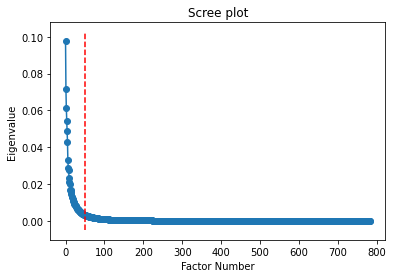

In [12]:
# Scree plot 

plt.plot(range(len(exp_var_ratio)), exp_var_ratio, marker = 'o')
plt.title("Scree plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")

from kneed import KneeLocator
kn = KneeLocator(range(len(exp_var_ratio)), exp_var_ratio, curve = 'convex', direction = 'decreasing')     # Elbow Point 
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles = 'dashed', colors = 'r')     

plt.show()

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

In [14]:
exp_var_ratio = lda.explained_variance_ratio_     # 각 성분별 설명 비중 확인하기
exp_var_ratio

array([0.23708117, 0.20328823, 0.17798282, 0.10633489, 0.09415639,
       0.06896763, 0.04990535, 0.03507761, 0.02720591])

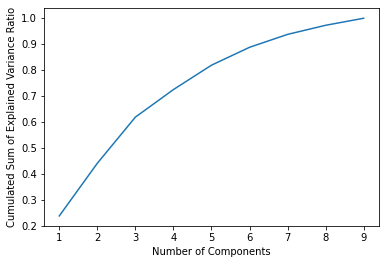

[0.23708117 0.4403694  0.61835223 0.72468711 0.8188435  0.88781114
 0.93771649 0.97279409 1.        ]


In [15]:
exp_var_ratio_cumsum = np.cumsum(exp_var_ratio)     

plt.plot(list(range(1, 1+len(exp_var_ratio_cumsum))), exp_var_ratio_cumsum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()

print(exp_var_ratio_cumsum)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

import time     # time() 메서드로 time stamp 찍기
from sklearn.metrics import accuracy_score     # Test Accuracy 확인

from tqdm import tqdm     # 진행 상황 확인 (원본 데이터, PCA 축소 데이터는 시간이 오래 걸릴 수 있으므로 tqdm을 활용하고자 함)

원본 데이터

In [17]:
rf_clf = RandomForestClassifier(random_state = 22)     # RandomForestClassifier 객체 생성
lgbm_clf = LGBMClassifier(random_state = 22)     # LGBMClassifier 객체 생성

clfs = [rf_clf, lgbm_clf]     # 각 객체를 리스트에 저장

In [18]:
for clf in tqdm(clfs):
    start = time.time()     # 시작 시간
    clf.fit(X_train, np.ravel(y_train))     # 원본 데이터 Training
    end = time.time()     # 완료 시간
    elapse_time = end - start     # 경과 시간
    
    print("Classifier :", clf.__class__.__name__)
    print("Training 시간 :", elapse_time)
    print("Test Accuracy :", accuracy_score(y_test, clf.predict(X_test)))
    print()

  0%|          | 0/2 [00:00<?, ?it/s]

Classifier : RandomForestClassifier
Training 시간 : 59.00780963897705


 50%|█████     | 1/2 [00:59<00:59, 59.88s/it]

Test Accuracy : 0.9699285714285715

Classifier : LGBMClassifier
Training 시간 : 282.21233224868774


100%|██████████| 2/2 [05:42<00:00, 171.44s/it]

Test Accuracy : 0.9723571428571428



PCA 축소 데이터

In [19]:
pca = PCA(n_components = 50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)     

In [20]:
for clf in tqdm(clfs):
    start = time.time()     # 시작 시간
    clf.fit(X_train_pca, np.ravel(y_train))     # PCA 축소 데이터 Training
    end = time.time()     # 완료 시간
    elapse_time = end - start     # 경과 시간
    
    print("Classifier :", clf.__class__.__name__)
    print("Training 시간 :", elapse_time)
    print("Test Accuracy :", accuracy_score(y_test, clf.predict(X_test_pca)))
    print()

  0%|          | 0/2 [00:00<?, ?it/s]

Classifier : RandomForestClassifier
Training 시간 : 75.05943822860718


 50%|█████     | 1/2 [01:15<01:15, 75.54s/it]

Test Accuracy : 0.9525

Classifier : LGBMClassifier
Training 시간 : 32.83708453178406


100%|██████████| 2/2 [01:49<00:00, 54.67s/it]

Test Accuracy : 0.9545



LDA 축소 데이터

In [21]:
lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)     # Test Data는 transform만!

In [22]:
for clf in clfs:
    start = time.time()     # 시작 시간
    clf.fit(X_train_lda, np.ravel(y_train))     # LDA 축소 데이터 Training
    end = time.time()     # 완료 시간
    elapse_time = end - start     # 경과 시간

    print("Classifier :", clf.__class__.__name__)
    print("Training 시간 :", elapse_time)
    print("Test Accuracy :", accuracy_score(y_test, clf.predict(X_test_lda)))

Classifier : RandomForestClassifier
Training 시간 : 21.792864561080933
Test Accuracy : 0.8482857142857143
Classifier : LGBMClassifier
Training 시간 : 4.7666120529174805
Test Accuracy : 0.8480714285714286


특정한 틀 없이 자유롭게 해주시면 됩니다!